In [33]:
import os
import sys
from pathlib import Path

# setting proper working directory
PROJECT_DIRECTORY = Path(os.path.abspath('')).resolve().parents[0]
sys.path.extend([str(PROJECT_DIRECTORY)])

print(f'Python {sys.version} on {sys.platform}')
print('Project directory: ', PROJECT_DIRECTORY)

Python 3.12.5 (tags/v3.12.5:ff3bc82, Aug  6 2024, 20:45:27) [MSC v.1940 64 bit (AMD64)] on win32
Project directory:  C:\Users\s8347434\Documents\RecBole-GNN


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [61]:
dataset_df = pd.read_csv("../eval/log/Dataset/dataset_eval.csv", sep="\t")

In [62]:
# Loop through columns that start with "average_clustering"
for col in dataset_df.columns:
    if col.startswith('average_clustering'):
        # Calculate log10 and create a new column with "_log" suffix
        dataset_df[f"{col}_log"] = np.log10(dataset_df[col])

dataset_df['dataset'] = dataset_df['dataset'].str.extract(r'-(\d+)$').astype(int)

In [77]:
def plot_column_distribution(df, column, dataset_range):
    """
    Plots the distribution of a column across datasets.

    Args:
        df (pd.DataFrame): The DataFrame containing dataset characteristics.
        column (str): The column to plot.
    """
    # Prepare data
    if dataset_range:
        lower_bound, upper_bound = dataset_range
        datasets = df[(df['dataset'] >= lower_bound) & (df['dataset'] <= upper_bound)]['dataset']
    else:
        datasets = df['dataset']
        
    values = df[column]

    # Plotting
    fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 1]})
    fig.suptitle(f"Distribution of '{column}' Across Datasets", fontsize=16)
    
    if column == "sparsity":
        # Determine granular y-axis limits
        values = (1-values) * 100  # Convert to percentages
        y_min = values.min() - 0.01  # Add a small buffer below min value
        y_max = values.max() + 0.01  # Add a small buffer above max value
        y_ticks = np.linspace(y_min, y_max, num=10)  # Granular ticks
    else:
        y_min = values.min() * 0.95
        y_max = values.max() * 1.05
        y_ticks = None
    
    # Bar plot of values
    ax[0].bar(datasets, values, color='skyblue', alpha=0.8)
    if column == 'sparsity':
        ax[0].set_ylim(y_min, y_max)
        ax[0].set_yticks(y_ticks)
    ax[0].set_ylabel(column)
    ax[0].set_xlabel("Datasets")
    ax[0].set_title(f"Value of {column} per Dataset")
    ax[0].grid(True, axis='y', linestyle='--', alpha=0.6)
    
    # Show only every 10th label
    ax[0].set_xticks(range(0, len(datasets), 10))
    ax[0].set_xticklabels(datasets[::10])

    # Histogram to show the distribution
    ax[1].hist(values, bins=30, color='lightcoral', alpha=0.8, edgecolor='black', density=True)
    ax[1].set_title(f"Distribution of {column} Values")
    ax[1].set_xlabel(column)
    ax[1].set_ylabel("Frequency")
    ax[1].grid(True, axis='y', linestyle='--', alpha=0.6)
    
    # Overlay density curve
    kde = gaussian_kde(values)
    x_vals = np.linspace(values.min(), values.max(), 400)
    density_vals = kde(x_vals)
    ax[1].plot(x_vals, density_vals, color='blue', lw=2, label='Density')
    ax[1].legend()
    
    # Adjust layout and show
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

TypeError: 'module' object is not subscriptable

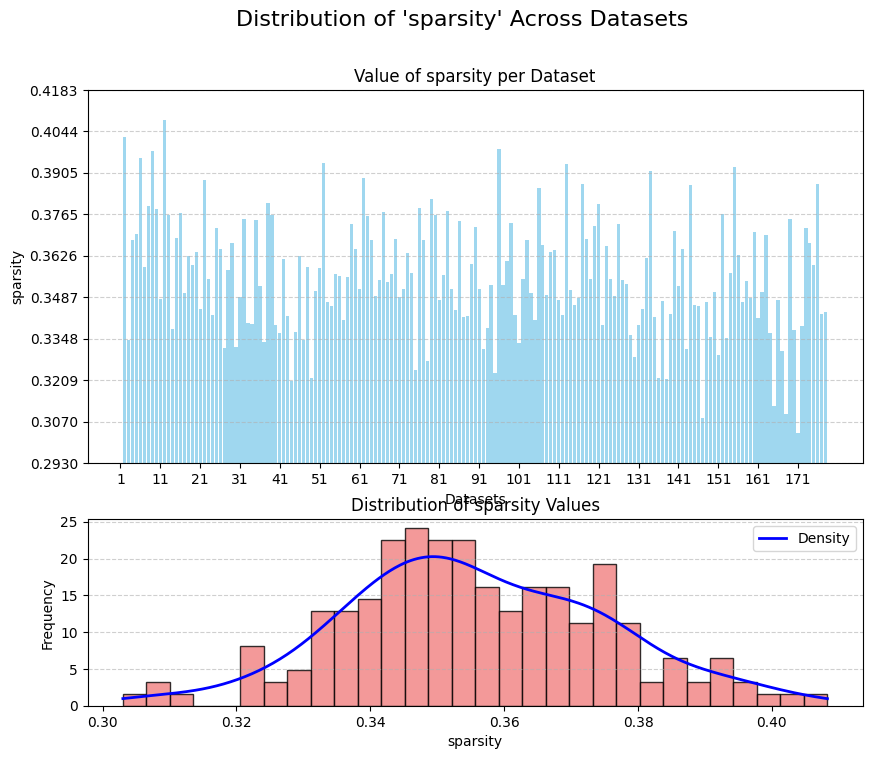

In [78]:
# Example usage: Plot for 'sparsity'
plot_column_distribution(dataset_df, "sparsity", dataset_range=[1,177])

# Example usage: Plot for 'user_num'
plot_column_distribution(dataset_df, "user_num", dataset_range=[1,177])